In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from allensdk.brain_observatory.behavior.behavior_session import BehaviorSession

import visual_behavior.utilities as vbu
import visual_behavior.database as db


from visual_behavior.translator.foraging2 import data_to_change_detection_core
from visual_behavior.translator.core import create_extended_dataframe

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook

In [47]:
release_table = pd.read_csv('/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/visual_behavior_spring_2021_release_master_list.csv')

mouse_id = release_table.sample(random_state=7)['mouse_id'].iloc[0]
mouse_table = release_table.query('mouse_id == @mouse_id')
bsid = mouse_table[
    (mouse_table['session_type'].str.contains('TRAINING_5', na=False))
    &(~mouse_table['session_type'].str.contains('handoff', na=False))
]['behavior_session_id'].iloc[0]
bsid

939970161

## get performance df from VBA (for comparison)

In [39]:
pkl_path = db.get_pkl_path(bsid)
data = pd.read_pickle(pkl_path)
core_data = data_to_change_detection_core(data)

vba_trial_df = create_extended_dataframe(**core_data)
nonaborted_trial_df = vba_trial_df.query('trial_type != "aborted"').reset_index()

for trial_limit in ['True','False']:
    df = nonaborted_trial_df
    df['hit_rate_trial_limit={}'.format(trial_limit)], df['fa_rate_trial_limit={}'.format(trial_limit)], df['d_prime_trial_limit={}'.format(trial_limit)] = vbu.get_response_rates(
        vba_trial_df.query('trial_type != "aborted"'),
        sliding_window=100,
        apply_trial_number_limit=trial_limit
    )

cols_to_merge = [
    'index',
    'hit_rate_trial_limit=True',
    'fa_rate_trial_limit=True',
    'd_prime_trial_limit=True',
    'hit_rate_trial_limit=False',
    'fa_rate_trial_limit=False',
    'd_prime_trial_limit=False',
]
vba_trial_df = vba_trial_df.reset_index().merge(
    nonaborted_trial_df[cols_to_merge],
    left_on = 'index',
    right_on = 'index',
    how='left'
)

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/utilities.py:158: RuntimeWarning: invalid value encountered in subtract
  d_prime = Z(hit_rate.fillna(0)) - Z(fa_rate.fillna(0))


In [40]:
session = BehaviorSession.from_lims(bsid)

In [49]:
session.get_rolling_performance_df()

,reward_rate,hit_rate_raw,hit_rate,false_alarm_rate_raw,false_alarm_rate,rolling_dprime
trials_id,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
613,0.0,0.057471,0.057471,0.0,0.038462,0.192464
614,0.0,0.057471,0.057471,0.0,0.038462,0.192464
615,0.0,0.057471,0.057471,0.0,0.038462,0.192464


In [41]:
session.trials = session.trials.merge(
    session.get_rolling_performance_df(),
    left_index=True,
    right_index=True
)

In [42]:
session.trials.query('not aborted').reset_index()

,trials_id,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,go,catch,auto_rewarded,correct_reject,start_time,stop_time,trial_length,response_time,change_frame,change_time,response_latency,initial_image_name,change_image_name,reward_rate,hit_rate_raw,hit_rate,false_alarm_rate_raw,false_alarm_rate,rolling_dprime
0,1,"[305.84780991077423, 305.9811963045504, 306.19...",305.397461,0.005,False,False,False,True,False,False,False,True,False,301.461149,309.500511,8.039363,305.847810,18297.0,305.251805,0.596005,im000,im054,NaN,NaN,NaN,NaN,NaN,NaN
1,2,[313.40359158441424],312.886573,0.005,False,False,False,True,False,False,False,True,False,309.734030,317.006333,7.272303,313.403592,18747.0,312.757585,0.646007,im054,im031,NaN,NaN,NaN,NaN,NaN,NaN
2,3,[],323.444510,0.005,False,False,False,True,False,False,False,True,False,317.256522,327.547670,10.291148,NaN,19379.0,323.298906,inf,im031,im073,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"[335.8372600504663, 336.07078340789303, 336.18...",335.487001,0.005,False,False,False,True,False,False,False,True,False,327.797870,339.590097,11.792227,335.837260,20101.0,335.341361,0.495899,im073,im031,NaN,NaN,NaN,NaN,NaN,NaN
4,6,"[347.06244203145616, 347.2459190695081, 347.37...",346.745523,0.005,False,False,False,True,False,False,False,True,False,343.576465,350.865270,7.288805,347.062442,20777.0,346.616564,0.445878,im031,im054,NaN,NaN,NaN,NaN,NaN,NaN
5,8,"[360.0055721835233, 360.1890339849051, 360.289...",360.005572,0.007,True,False,False,True,False,True,False,False,False,355.618922,363.658336,8.039414,360.005572,21544.0,359.409604,0.595969,im054,im000,NaN,1.000000,0.500000,NaN,NaN,NaN
6,9,"[367.17763530416414, 367.3277410189621, 367.44...",367.177635,0.007,True,False,False,True,False,True,False,False,False,363.891868,371.180693,7.288825,367.177635,21994.0,366.915277,0.262358,im000,im035,NaN,1.000000,0.750000,NaN,NaN,NaN
7,11,"[378.5863148237113, 378.70306085026823, 378.86...",NaN,0.000,False,False,False,False,False,False,True,False,True,374.416449,381.722017,7.305569,378.586315,22626.0,377.456551,1.129764,im035,im035,2.944853,1.000000,0.750000,0.000000,0.500000,0.674490
8,13,"[387.0260308566503, 387.19284481112845, 387.30...",387.026031,0.007,True,False,False,True,False,True,False,False,False,383.439971,390.728853,7.288882,387.026031,23166.0,386.463417,0.562614,im035,im045,2.839816,1.000000,0.833333,0.000000,0.500000,0.967422
9,20,[423.88727395725437],NaN,0.000,False,False,True,True,False,True,False,False,False,418.066209,425.321703,7.255495,423.887274,25241.0,421.072963,2.814311,im045,im073,2.696437,0.750000,0.750000,0.000000,0.500000,0.674490


<IPython.core.display.Javascript object>


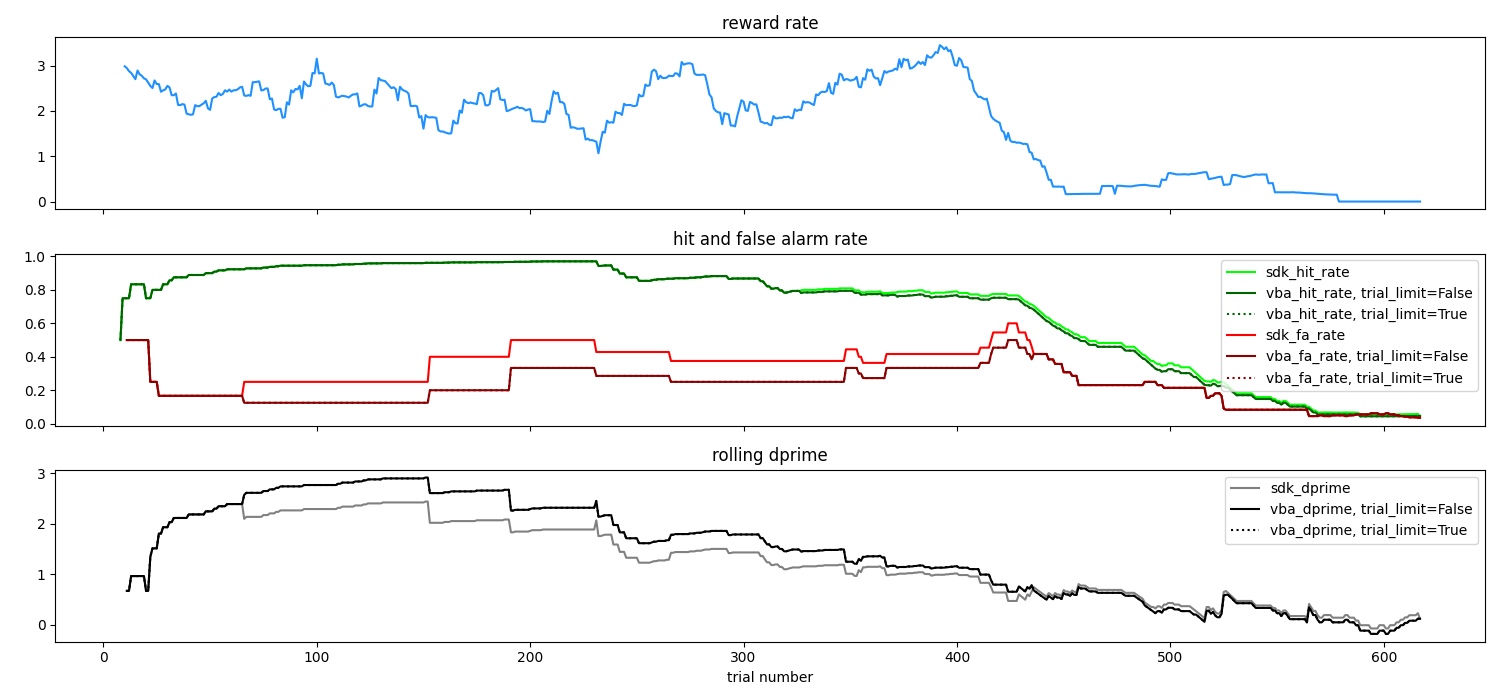

In [46]:
# def make_vba_sdk_comparison_plot()
fig, ax = plt.subplots(3,1,figsize = (15,7), sharex=True)

ax[0].plot(
    session.trials['reward_rate'],
    color='dodgerblue'
)

ax[0].set_title('reward rate')


ax[1].plot(
    session.trials.fillna(method='ffill')['hit_rate'],
    color='lime'
)

ax[1].plot(
    vba_trial_df.fillna(method='ffill')['hit_rate_trial_limit=False'],
    color='darkgreen'
)

ax[1].plot(
    vba_trial_df.fillna(method='ffill')['hit_rate_trial_limit=True'],
    color='darkgreen',
    linestyle=':'
)


ax[1].plot(
    session.trials.fillna(method='ffill')['false_alarm_rate'],
    color='red'
)

ax[1].plot(
    vba_trial_df.fillna(method='ffill')['fa_rate_trial_limit=False'],
    color='darkred'
)

ax[1].plot(
    vba_trial_df.fillna(method='ffill')['fa_rate_trial_limit=True'],
    color='darkred',
    linestyle=':'
)


ax[1].legend(['sdk_hit_rate','vba_hit_rate, trial_limit=False','vba_hit_rate, trial_limit=True', 'sdk_fa_rate','vba_fa_rate, trial_limit=False', 'vba_fa_rate, trial_limit=True'],loc='upper right')

ax[1].set_title('hit and false alarm rate')

ax[2].plot(
    session.trials.fillna(method='ffill')['rolling_dprime'],
    color='gray'
)

ax[2].plot(
    vba_trial_df.fillna(method='ffill')['d_prime_trial_limit=False'],
    color='black'
)

ax[2].plot(
    vba_trial_df.fillna(method='ffill')['d_prime_trial_limit=True'],
    color='black',
    linestyle=':'
)

ax[2].legend(['sdk_dprime','vba_dprime, trial_limit=False','vba_dprime, trial_limit=True'],loc='upper right')

ax[2].set_title('rolling dprime')
ax[2].set_xlabel('trial number')

fig.tight_layout()

In [36]:
vba_trial_df['d_prime_trial_limit=False'].iloc[100:120]

100         NaN
101         NaN
102    1.950552
103    2.019438
104         NaN
105         NaN
106         NaN
107    1.982546
108         NaN
109    1.947614
110    1.914446
111    1.882876
112         NaN
113    1.900227
114         NaN
115         NaN
116         NaN
117    1.917074
118         NaN
119         NaN
Name: d_prime_trial_limit=False, dtype: float64

In [37]:
vba_trial_df['d_prime_trial_limit=True'].iloc[100:120]

100         NaN
101         NaN
102    1.950552
103    2.019438
104         NaN
105         NaN
106         NaN
107    1.982546
108         NaN
109    1.947614
110    1.914446
111    1.882876
112         NaN
113    1.900227
114         NaN
115         NaN
116         NaN
117    1.917074
118         NaN
119         NaN
Name: d_prime_trial_limit=True, dtype: float64

In [26]:
hr, fa, dp = vbu.get_response_rates(
        vba_trial_df.query('trial_type != "aborted"'),
        sliding_window=100,
        apply_trial_number_limit=True
    )

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/utilities.py:158: RuntimeWarning: invalid value encountered in subtract
  d_prime = Z(hit_rate.fillna(0)) - Z(fa_rate.fillna(0))


In [27]:
hr[100:120]

array([0.76190476, 0.76470588, 0.76744186, 0.75862069, 0.75      ,
       0.75      , 0.75      , 0.74157303, 0.74157303, 0.75      ,
       0.75280899, 0.75280899, 0.74444444, 0.74444444, 0.74157303,
       0.73033708, 0.71910112, 0.70786517, 0.70454545, 0.69318182])

In [28]:
hr, fa, dp = vbu.get_response_rates(
        vba_trial_df.query('trial_type != "aborted"'),
        sliding_window=100,
        apply_trial_number_limit=False
    )

In [29]:
hr[100:120]

array([0.76190476, 0.76470588, 0.76744186, 0.75862069, 0.75      ,
       0.75      , 0.75      , 0.74157303, 0.74157303, 0.75      ,
       0.75280899, 0.75280899, 0.74444444, 0.74444444, 0.74157303,
       0.73033708, 0.71910112, 0.70786517, 0.70454545, 0.69318182])

In [56]:
305.99345045427395 - 305.67822510136534

0.3152253529086124

In [55]:
data['items']['behavior']['trial_log']

[{'index': 0,
  'cumulative_rewards': 0,
  'cumulative_volume': 0.0,
  'stimulus_changes': [],
  'success': False,
  'licks': [(305.67802619375044, 18035)],
  'trial_params': {'catch': False, 'auto_reward': True, 'change_time': 5},
  'rewards': [],
  'events': [['trial_start', '', 304.7760164511557, 17981],
   ['initial_blank', 'enter', 304.7760363973232, 17981],
   ['initial_blank', 'exit', 304.7760663165745, 17981],
   ['pre_change', 'enter', 304.7760801680797, 17981],
   ['pre_change', 'exit', 304.7760934655247, 17981],
   ['stimulus_window', 'enter', 304.77615219590683, 17981],
   ['early_response', '', 305.6781469788759, 18035],
   ['abort', '', 305.67818991854205, 18035],
   ['timeout', 'enter', 305.67822510136534, 18035],
   ['timeout', 'exit', 305.99345045427395, 18054],
   ['trial_end', '', 305.9934848060069, 18054]]},
 {'index': 1,
  'cumulative_rewards': 1,
  'cumulative_volume': 0.005,
  'stimulus_changes': [(('im000', 'im000'),
    ('im054', 'im054'),
    310.0468668449263

In [70]:
for entry in data['items']['behavior']['trial_log']:
    event_dict = pd.DataFrame(entry['events'], columns = ['event_name','trigger','time','frame'])
    if 'timeout' in list(event_dict['event_name']):
        timeout_start = event_dict.query('event_name == "timeout" and trigger == "enter"')['time'].iloc[0]
        timeout_end = event_dict.query('event_name == "timeout" and trigger == "exit"')['time'].iloc[0]
        trial_end = event_dict.query('event_name == "trial_end"')['time'].iloc[0]
        print('timeout duration = {}'.format(timeout_end - timeout_start))
        print('timeout_start to trial_end = {}'.format(trial_end - timeout_start))

timeout duration = 0.3152253529086124
timeout_start to trial_end = 0.31525970464156217
timeout duration = 0.30032251844738767
timeout_start to trial_end = 0.30035659315024077
timeout duration = 0.7006969523364432
timeout_start to trial_end = 0.7007304729790462
timeout duration = 0.41533766091293955
timeout_start to trial_end = 0.4153725667060826
timeout duration = 0.5154638204224398
timeout_start to trial_end = 0.5154970640349461
timeout duration = 0.4653687436905898
timeout_start to trial_end = 0.4654017102729995
timeout duration = 0.5154122928230436
timeout_start to trial_end = 0.5154463675258967
timeout duration = 0.4486593959192646
timeout_start to trial_end = 0.4486923625016743
timeout duration = 0.4829341144843511
timeout_start to trial_end = 0.48296818918714735
timeout duration = 0.7162452669406321
timeout_start to trial_end = 0.7162812808542185
timeout duration = 0.4823642635598162
timeout_start to trial_end = 0.4823972301422259
timeout duration = 0.31526413712327894
timeout_st

timeout duration = 0.3003247346882745
timeout_start to trial_end = 0.3003579783007808
timeout duration = 0.4496913330576717
timeout_start to trial_end = 0.44972540776052483
timeout duration = 0.44880843811529303
timeout_start to trial_end = 0.4488353100352924
timeout duration = 0.31530513757866174
timeout_start to trial_end = 0.3153389352512477
timeout duration = 0.5653990507842082
timeout_start to trial_end = 0.5654334025171011
timeout duration = 0.6154384444648713
timeout_start to trial_end = 0.6154711340170707
timeout duration = 0.6150048923516351
timeout_start to trial_end = 0.6150386900244484
timeout duration = 0.4821301731217318
timeout_start to trial_end = 0.48216313970419833
timeout duration = 0.4667261912018148
timeout_start to trial_end = 0.46675998887440073
timeout duration = 0.3152752183273151
timeout_start to trial_end = 0.31530735381943487
timeout duration = 0.4154614933695484
timeout_start to trial_end = 0.41549723025286767
timeout duration = 0.6987652214190803
timeout_s

timeout duration = 0.8490202553330164
timeout_start to trial_end = 0.8490548840961765
timeout duration = 0.7980242767021082
timeout_start to trial_end = 0.7980602906156946
timeout duration = 0.31602430772954904
timeout_start to trial_end = 0.3160572743120156
timeout duration = 0.3152777115983554
timeout_start to trial_end = 0.3153109552108617
timeout duration = 0.465857424794649
timeout_start to trial_end = 0.4658903913771155
timeout duration = 0.6315743399204621
timeout_start to trial_end = 0.6316067524426217
timeout duration = 0.6155157358639372
timeout_start to trial_end = 0.6155523038378306
timeout duration = 0.5499166693446114
timeout_start to trial_end = 0.5499490818669983
timeout duration = 0.46478836562209835
timeout_start to trial_end = 0.4648232714152982
timeout duration = 0.46537622350342644
timeout_start to trial_end = 0.4654083589955462
timeout duration = 0.3152356030225292
timeout_start to trial_end = 0.3152688466350355
timeout duration = 0.2986606148517694
timeout_start 

In [66]:
event_dict = pd.DataFrame(entry['events'], columns = ['event_name','trigger','time','frame'])
event_dict

,event_name,trigger,time,frame
0,trial_start,,304.776016,17981
1,initial_blank,enter,304.776036,17981
2,initial_blank,exit,304.776066,17981
3,pre_change,enter,304.776080,17981
4,pre_change,exit,304.776093,17981
5,stimulus_window,enter,304.776152,17981
6,early_response,,305.678147,18035
7,abort,,305.678190,18035
8,timeout,enter,305.678225,18035
9,timeout,exit,305.993450,18054


In [71]:
dir(session)

['LazyProperty',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_behavior_session_id',
 '_licks',
 '_metadata',
 '_raw_running_speed',
 '_rewards',
 '_running_speed',
 '_stimulus_presentations',
 '_stimulus_templates',
 '_stimulus_timestamps',
 '_task_parameters',
 '_trials',
 'api',
 'behavior_session_id',
 'cache_clear',
 'from_lims',
 'from_nwb_path',
 'get_performance_metrics',
 'get_reward_rate',
 'get_rolling_performance_df',
 'licks',
 'list_api_methods',
 'metadata',
 'raw_running_speed',
 'rewards',
 'running_speed',
 'stimulus_presentations',
 'stimulus_templates',
 'stimulus_timestamps',
 'task_parameters',
 'trials']

In [72]:
session.get_performance_metrics()

{'trial_count': 618,
 'go_trial_count': 223,
 'catch_trial_count': 34,
 'hit_trial_count': 80,
 'miss_trial_count': 143,
 'false_alarm_trial_count': 6,
 'correct_reject_trial_count': 28,
 'auto_rewarded_trial_count': 5,
 'rewarded_trial_count': 85,
 'total_reward_count': 85,
 'total_reward_volume': 0.5850000000000001,
 'maximum_reward_rate': 3.451244123496079,
 'engaged_trial_count': 317,
 'mean_hit_rate': 0.5222845613888066,
 'mean_hit_rate_uncorrected': 0.5268241204030738,
 'mean_hit_rate_engaged': 0.8482776632070269,
 'mean_false_alarm_rate': 0.25736092883151707,
 'mean_false_alarm_rate_uncorrected': 0.23325606855018619,
 'mean_false_alarm_rate_engaged': 0.3572374955491839,
 'mean_dprime': 0.8166255548515846,
 'mean_dprime_engaged': 1.4784035116821976,
 'max_dprime': 2.443314788714788,
 'max_dprime_engaged': 2.425175821448251}